## Analysis of scaling methods in deriving future volume evolutions of valley glaciers

**Valentina Radić, Regine Hock and Johannes Oerlemans (2008) - Journal of Glaciology - http://doi.org/10.3189/002214308786570809**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [228]:
# specify initial values [in SI - units]
volume_0 = 3.93e9
area_0 = 19.45e6
length_0 = 10.254e3

# specify scaling exponents
gamma = 1.375
q = 2.2

In [218]:
# compute scaling constants
c_a = volume_0/area_0**gamma
c_l = volume_0/length_0**q

#c_a = 0.374
#c_l = 5.893

print('Volume/area scaling constant: ', c_a)
print('Volume/length scaling constant: ', c_l)

Volume/area scaling constant:  0.37336026196016653
Volume/length scaling constant:  5.8942324837255295


In [237]:
# compute number of elevation bands
n_bands = int(length_0/100)
# compute elevation bands
h_max = 1950
h_min = 350
h = np.linspace(h_min, h_max, n_bands, endpoint=True)

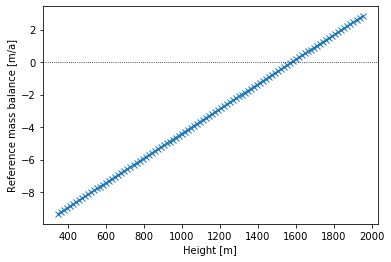

In [238]:
# function to compute mass balance profile
def mb_profile(h, k, m):
    return m + k*h

# compute/define referenc mass balance
ref_mb = mb_profile(h, 0.0076, -12)
# visualize
plt.plot(h, ref_mb, marker='x')
plt.xlabel('Height [m]')
plt.ylabel('Reference mass balance [m/a]')
plt.axhline(0, c='k', ls=':', lw=0.8)

In [239]:
def poisson_dist(l, n):
    """Compute PMF for Poisson distribution
    for an expected value l from 0 to n"""
    ret = np.zeros(n)
    for k in np.arange(0,n):
        ret[k] = l**k*2.71829**(-l)/np.math.factorial(k)
    return ret

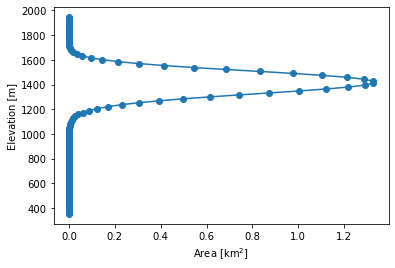

In [240]:
# compute elevation distribution
area_dist = area_0*poisson_dist(np.floor(h.size/3),h.size)[::-1]
plt.plot(area_dist/1e6, h, marker='o')
plt.xlabel('Area [km$^2$]')
plt.ylabel('Elevation [m]');

In [259]:
def erlang_pdf(k,l,n):
    """Compute PMF for Poisson distribution
    for an expected value l from 0 to n"""
    ret = np.zeros(n)
    for x in np.arange(0,n):
        ret[x] = l**k*x**(k-1)*2.71829**(-l*x)/np.math.factorial(k-1)
    return ret

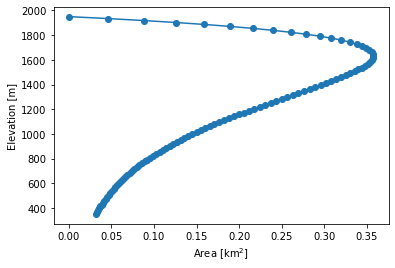

In [277]:
# compute elevation distribution
area_dist = area_0*erlang_pdf(2,0.05,h.size)[::-1]
plt.plot(area_dist/1e6, h, marker='o')
plt.xlabel('Area [km$^2$]')
plt.ylabel('Elevation [m]');

In [278]:
# define grid (more like empty containers)
years = np.arange(0,100)
spec_mb = years*0
volume = years*0
volume[0] = volume_0
area = years*0
area[0] = area_0
length = years*0
length[0] = length_0

In [279]:
# specify initial mass balance perturbation
mb_perturb = -0.015

def recursive_area_change(k, area_dist, area_change):
    """Function changes area in area distribution,
    eliminating lower-lying elevation bands
    if area in said band drops below zero"""
    area_dist[k] += area_change
    if area_dist[k] < 0:
        recursive_area_change(k+1, area_dist, area_dist[k])
        area_dist[k] = 0

# iterate over all years
for t in years[:-1]:
    # compute volume change from mass balance
    spec_mb = ref_mb + (mb_perturb*t)
    volume_change = np.sum(spec_mb*area_dist)
    volume[t+1] = volume[t] + volume_change
    area[t+1] = (volume[t+1]/c_a)**(1/gamma)
    recursive_area_change(0, area_dist, area[t+1] - area[t])

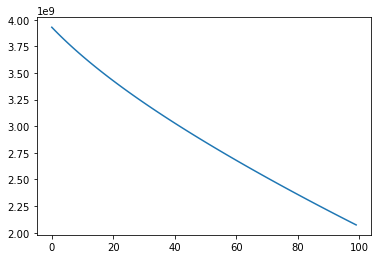

In [281]:
volume_va = np.copy(volume)
plt.plot(volume_va)

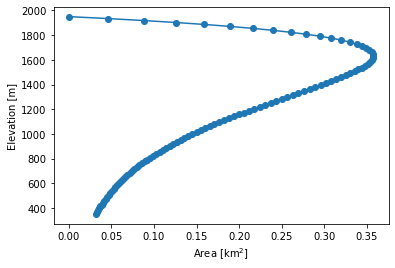

In [307]:
# compute elevation distribution
area_dist = area_0*erlang_pdf(2,0.05,h.size)[::-1]
plt.plot(area_dist/1e6, h, marker='o')
plt.xlabel('Area [km$^2$]')
plt.ylabel('Elevation [m]');

In [308]:
# define grid (more like empty containers)
years = np.arange(0,100)
spec_mb = years*0
volume = years*0
volume[0] = volume_0
area = years*0
area[0] = area_0
length = years*0
length[0] = length_0

In [309]:
# specify initial mass balance perturbation
mb_perturb = -0.015

def recursive_area_change(k, area_dist, area_change):
    """Function changes area in area distribution,
    eliminating lower-lying elevation bands
    if area in said band drops below zero"""
    area_dist[k] += area_change
    if area_dist[k] < 0:
        recursive_area_change(k+1, area_dist, area_dist[k])
        area_dist[k] = 0

# iterate over all years
length_change = 0
for t in years[:-1]:
    # compute volume change from mass balance
    spec_mb = ref_mb + (mb_perturb*t)
    volume_change = np.sum(spec_mb*area_dist)
    volume[t+1] = volume[t] + volume_change
    length[t+1] = (volume[t+1]/c_l)**(1/q)
    length_change += length[t+1] - length[t]
    if length_change <= -100:
        area_dist[np.nonzero(area_dist)[0][0]] = 0
        lenght_change += 100
    area[t+1] = sum(area_dist)

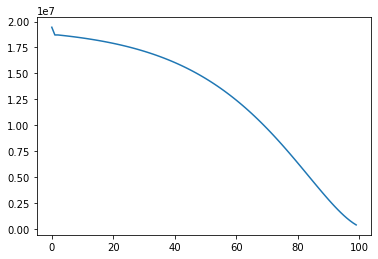

In [310]:
plt.plot(area)